In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [5]:
df["Country"].value_counts() 

Country
USA             25927
China           17525
South Korea     14107
Japan           13924
UK              12276
Germany         12258
India           10479
France          10426
Brazil          10399
Canada           8819
Italy            8795
Australia        6877
South Africa     5172
Nigeria          3551
Pakistan         3549
New Zealand      3413
Name: count, dtype: int64

In [6]:
df["Gender"].value_counts()

Gender
M    100686
F     66811
Name: count, dtype: int64

In [7]:
df["Cancer_Stage"].value_counts()

Cancer_Stage
Regional      66981
Localized     66799
Metastatic    33717
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(167497, 28)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [12]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


## Visualizations

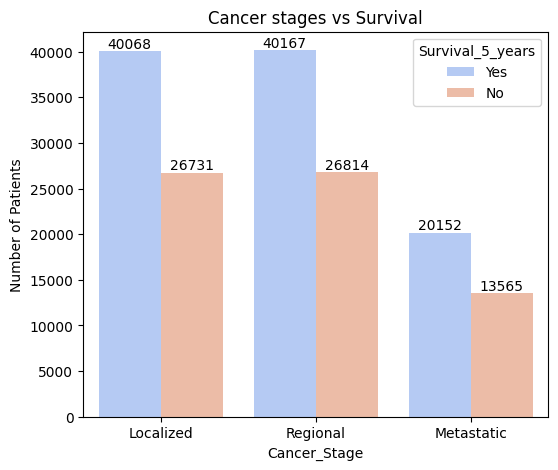

In [13]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="Cancer_Stage", hue="Survival_5_years", data=df, palette="coolwarm")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.xlabel("Cancer_Stage")
plt.ylabel("Number of Patients")

plt.title("Cancer stages vs Survival")
plt.show()


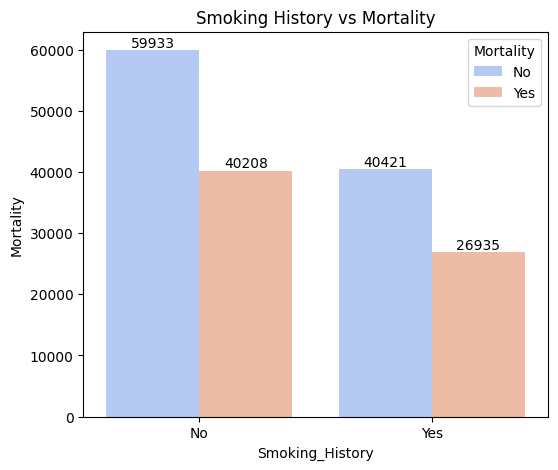

In [14]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="Smoking_History", hue="Mortality", data=df, palette="coolwarm")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.xlabel("Smoking_History")
plt.ylabel("Mortality")

plt.title("Smoking History vs Mortality")
plt.show()

C:\Users\sals\AppData\Local\Temp\ipykernel_22200\3488712259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancer_Stage", y="Tumor_Size_mm", data=df, palette="coolwarm")


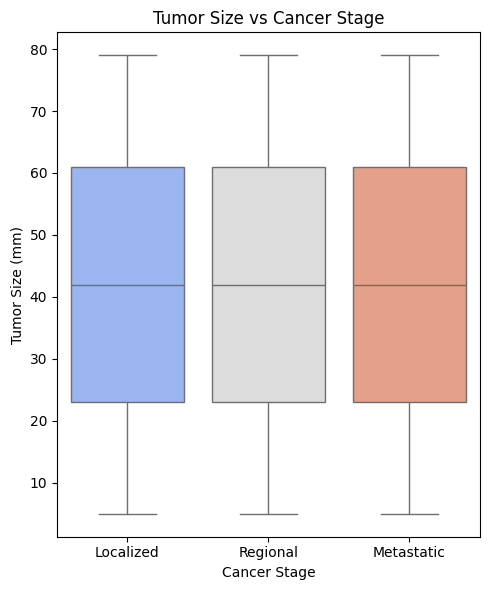

In [15]:
plt.figure(figsize=(5, 6))
sns.boxplot(x="Cancer_Stage", y="Tumor_Size_mm", data=df, palette="coolwarm")
plt.title("Tumor Size vs Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (mm)")
plt.tight_layout()
plt.show()


C:\Users\sals\AppData\Local\Temp\ipykernel_22200\3263588294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survival_Prediction", y="Healthcare_Costs", data=df, palette="coolwarm")


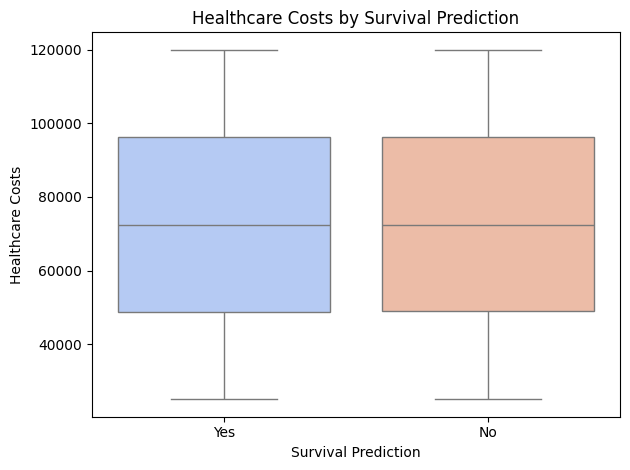

In [16]:
sns.boxplot(x="Survival_Prediction", y="Healthcare_Costs", data=df, palette="coolwarm")
plt.title("Healthcare Costs by Survival Prediction")
plt.xlabel("Survival Prediction")
plt.ylabel("Healthcare Costs")
plt.tight_layout()
plt.show()


# DATA PROCESSING

In [17]:
df = df.drop(columns = ["Patient_ID"])

In [18]:
X = df.drop(columns= ["Survival_Prediction"])
Y = df["Survival_Prediction"]

In [19]:
categorical_cols = X.select_dtypes(include= ["object"]).columns

In [20]:
categorical_cols

Index(['Country', 'Gender', 'Cancer_Stage', 'Family_History',
       'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk',
       'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
       'Genetic_Mutation', 'Screening_History', 'Early_Detection',
       'Treatment_Type', 'Survival_5_years', 'Mortality', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status'],
      dtype='object')

In [21]:
len(categorical_cols)

21

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [23]:
X.head()

,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status
0,14,77,1,0,69,0,0,1,2,1,...,1,1,0,54413,50,5,1,0,2,0
1,14,59,1,0,33,0,0,0,2,2,...,0,1,0,76553,37,25,1,1,0,1
2,8,66,1,2,17,0,1,0,0,1,...,0,1,0,62805,54,27,1,0,2,1
3,15,83,1,2,14,0,0,0,1,0,...,3,1,0,89393,45,11,1,0,2,0
4,4,66,1,0,34,0,1,0,0,1,...,3,1,0,66425,15,27,1,1,0,0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Country                     167497 non-null  int64
 1   Age                         167497 non-null  int64
 2   Gender                      167497 non-null  int64
 3   Cancer_Stage                167497 non-null  int64
 4   Tumor_Size_mm               167497 non-null  int64
 5   Family_History              167497 non-null  int64
 6   Smoking_History             167497 non-null  int64
 7   Alcohol_Consumption         167497 non-null  int64
 8   Obesity_BMI                 167497 non-null  int64
 9   Diet_Risk                   167497 non-null  int64
 10  Physical_Activity           167497 non-null  int64
 11  Diabetes                    167497 non-null  int64
 12  Inflammatory_Bowel_Disease  167497 non-null  int64
 13  Genetic_Mutation            167497 non-null 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [27]:
X_train

,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status
24800,3,87,1,1,54,1,0,0,2,2,...,3,1,1,105614,59,12,0,1,1,0
66479,8,71,1,2,73,0,1,1,1,2,...,3,1,1,115822,33,10,1,1,2,0
143021,3,63,0,2,37,0,0,0,2,0,...,0,1,0,50819,50,10,0,0,2,0
17512,2,51,1,0,31,0,1,0,2,2,...,0,1,0,25902,47,8,0,0,1,1
86417,4,67,1,1,15,0,1,0,0,1,...,3,1,0,118806,20,5,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,7,75,1,0,14,0,0,1,0,0,...,3,0,1,44031,42,13,0,0,1,0
103694,2,70,0,2,26,1,1,0,0,1,...,2,1,0,104569,11,16,0,0,2,1
131932,0,59,0,2,22,0,0,0,1,2,...,1,1,0,28140,12,12,1,0,2,1
146867,3,85,1,1,26,0,1,1,1,2,...,3,1,0,113454,23,22,1,0,2,0


In [28]:
y_train

24800      No
66479     Yes
143021    Yes
17512      No
86417      No
         ... 
119879    Yes
103694    Yes
131932    Yes
146867     No
121958    Yes
Name: Survival_Prediction, Length: 133997, dtype: object

In [29]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Select only non-negative features (required by chi2) — categorical/numeric encoded
X_cat = X_train.select_dtypes(include=['int64', 'float64'])

# Scale features to [0, 1] (required for chi2)
scaler = MinMaxScaler()
X_cat_scaled = scaler.fit_transform(X_cat)

# Chi2 test: score all features (k='all') w.r.t. classification target
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat_scaled, y_train)

# Show scores
feature_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)


                       Feature  Chi2 Score
11                    Diabetes    2.103967
16              Treatment_Type    1.662381
25            Insurance_Status    1.464241
3                 Cancer_Stage    0.640925
14           Screening_History    0.579760
17            Survival_5_years    0.545494
23     Economic_Classification    0.381835
24           Healthcare_Access    0.356673
22              Urban_or_Rural    0.355363
6              Smoking_History    0.280786
9                    Diet_Risk    0.222693
7          Alcohol_Consumption    0.209884
4                Tumor_Size_mm    0.122267
21     Mortality_Rate_per_100K    0.115776
5               Family_History    0.095201
8                  Obesity_BMI    0.075796
15             Early_Detection    0.063440
0                      Country    0.058895
18                   Mortality    0.056049
13            Genetic_Mutation    0.049299
19            Healthcare_Costs    0.033721
10           Physical_Activity    0.024455
1          

In [30]:
top_features = (feature_scores.head(5))["Feature"].tolist()

In [31]:
X = X[top_features]

In [32]:
X.shape

(167497, 5)

In [33]:
Y.shape

(167497,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

## MODEL BUILDING

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)     

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100 , learning_rate=0.1 , max_depth=3 , random_state=42)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.606

In [38]:
report = classification_report(y_test,y_pred)

d:\crc-prognosis-model\project\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\crc-prognosis-model\project\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\crc-prognosis-model\project\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
print(report)

              precision    recall  f1-score   support

          No       0.00      0.00      0.00     13199
         Yes       0.61      1.00      0.75     20301

    accuracy                           0.61     33500
   macro avg       0.30      0.50      0.38     33500
weighted avg       0.37      0.61      0.46     33500



In [40]:
y_proba = gb.predict_proba(X_test)[ : , 1] if len(Y.unique())== 2 else None
roc_auc_score(y_test , y_proba)

np.float64(0.4998466278955989)

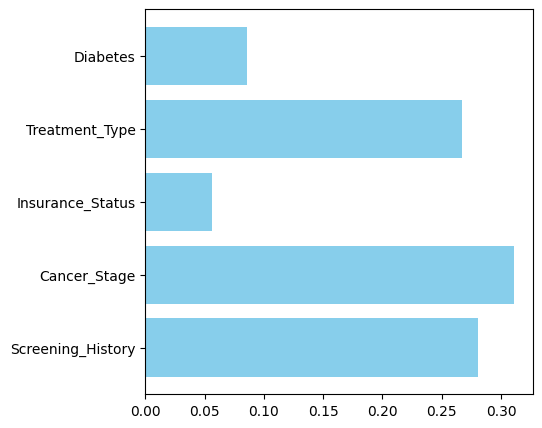

In [41]:
plt.figure(figsize=(5,5))
plt.barh(top_features, gb.feature_importances_, color="skyblue")
plt.gca().invert_yaxis()
plt.show()


## Testing

In [42]:
X.columns

Index(['Diabetes', 'Treatment_Type', 'Insurance_Status', 'Cancer_Stage',
       'Screening_History'],
      dtype='object')

In [43]:
test_array = np.array([0,0,0,0,0]).reshape(1,-1)

In [44]:
gb.predict(test_array)

array(['Yes'], dtype=object)